<class 'numpy.ndarray'>
(512, 512, 265)


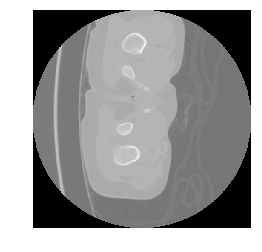

(1, 512, 265)


In [15]:
import os
import numpy as np
from utils import imshow
import nibabel as nib

img = nib.load('../data/19981029103253/19981029103253_CHEST_ABD_PELVIS_102.nii.gz')

# img.shape

dat = img.get_fdata()
print(type(dat)) #np.array
print(dat.shape) #(512, 512, 265)

# np.save('neuro.npy', dat)

imshow(dat)
# dat = dat.reshape(-1, 240, 240, 4) --doesn't work



dat1 = dat[[0]] #shape=(1 x 512 x 265)....do labels have this dimension too? is this a slice?
print(dat1.shape)
dat1.reshape(1, 512, 265, 1)
# print(dat1.shape)

# Inputs into the CNN consist of matrices of size 1 x 256 x 256 x 4, where the four separate channels 
# represent the four different MRI modalities common in neuroimaging applications.

# Output labels from the CNN consist of matrices of size 1 x 256 x 256 x 1. At each voxel location, 
# there are one of 5 possible labels.


# doesn't work
# fname = '../data/neuro_data/neuro.npy'
# dat = np.memmap(fname, dtype='int16', mode='r')
# imshow(dat)




In [16]:
import tensorflow as tf

X = tf.placeholder(tf.float32, [1, 512, 512])

# errors because it expects X to be 4-d
conv = tf.layers.conv2d(X, filters=8, kernel_size=(3, 3), padding='same')

# The input images in the variable `dat` are matrices of shape `1 x 240 x 240 x 4`.
# should we reshape our data to be 4D as well? ie to become something like 1 x 512 x 512 x 1


relu = tf.nn.relu(conv)
pool = tf.layers.max_pooling2d(relu, pool_size=(2, 2), strides=(2, 2))

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.InteractiveSession(config=config)

init = tf.global_variables_initializer()
sess.run(init)

output = sess.run(pool, feed_dict={X: dat1})

print(output.shape)













ValueError: Input 0 of layer conv2d_4 is incompatible with the layer: expected ndim=4, found ndim=3. Full shape received: [1, 512, 512]